# Project 2 Regression Challenge

## Problem Statement
### Predict the price of homes at sale for the Aimes Iowa Housing dataset

## Executive Summary

There are three files:

* train.csv -- this data contains all of the training data for your model.
    * The target variable (SalePrice) is removed from the test set!
* test.csv -- this data contains the test data for your model. You will feed this data into your regression model to make predictions.
* sample_sub_reg.csv -- An example of a correctly formatted submission for this challenge (with a random number provided as predictions for SalePrice. Please ensure that your submission to Kaggle matches this format.

## All libraries used should be added here



In [33]:
#Imports the numpy and the pandas libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.api as sm

# Turn on plotting display in the notebook
%matplotlib inline 

## 1. Read in the Aimes Iowa Housing dataset

In [34]:
train_data_path = './datasets/train.csv'
test_data_path = './datasets/test.csv'
final_sub_reg_data_path = './datasets/final_sub_reg.csv'

# the SAT & ACT data for 2017 is being assigned to the panda dataframes data_sat2017 and data_act2017.
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

data_type_test = pd.DataFrame()
data_type_test["Columns"] = train_data.columns.values
data_type_test["Data Type"] = train_data.dtypes.values


train_data_copy = pd.read_csv(train_data_path)
test_data_copy = pd.read_csv(test_data_path)

# 2. Cleaning the data

In [35]:
train_data.describe().T



,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Cond         114
Garage Qual         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Bsmt Unf SF           1
BsmtFin SF 2          1
Total Bsmt SF         1
BsmtFin SF 1          1
Overall Cond          0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Heating               0
Exter Cond            0
TotRms AbvGrd         0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch        0
Open Porch SF   

Pool QC               9
Misc Feature         65
Alley               140
Fence               400
Fireplace Qu       1051
Lot Frontage       1721
Garage Finish      1937
Garage Qual        1937
Garage Cond        1937
Garage Yr Blt      1937
Garage Type        1938
Bsmt Exposure      1993
BsmtFin Type 2     1995
Bsmt Qual          1996
BsmtFin Type 1     1996
Bsmt Cond          1996
Mas Vnr Type       2029
Mas Vnr Area       2029
Bsmt Full Bath     2049
Bsmt Half Bath     2049
BsmtFin SF 1       2050
Garage Area        2050
BsmtFin SF 2       2050
Bsmt Unf SF        2050
Total Bsmt SF      2050
Garage Cars        2050
Bedroom AbvGr      2051
Half Bath          2051
Full Bath          2051
Kitchen AbvGr      2051
                   ... 
Lot Area           2051
Street             2051
Lot Shape          2051
Land Contour       2051
Utilities          2051
Lot Config         2051
Land Slope         2051
Neighborhood       2051
Condition 1        2051
Condition 2        2051
Bldg Type       

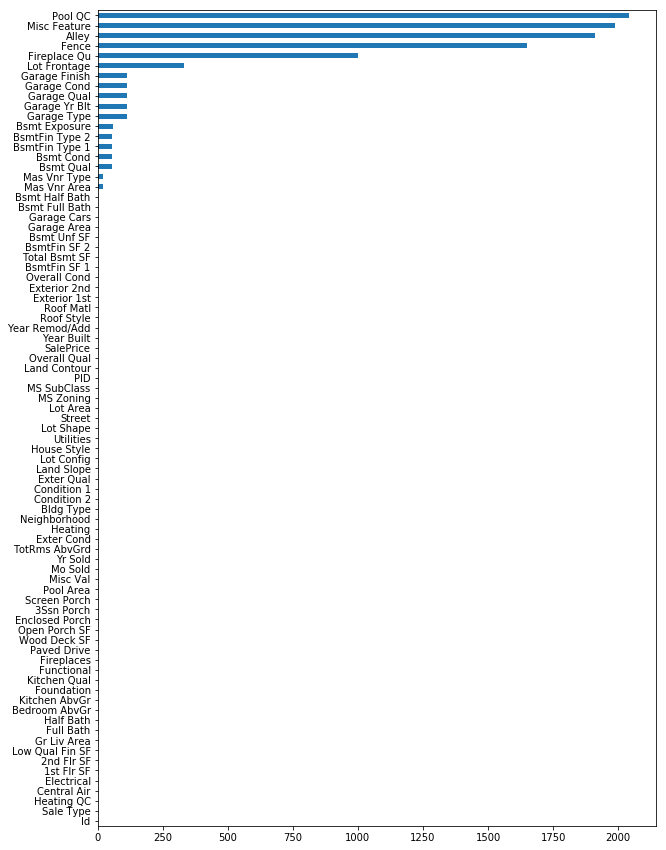

In [36]:

train_data.isnull().sum().sort_values(ascending=True).plot(kind='barh', figsize=(10,15))
display(train_data.isnull().sum().sort_values(ascending=False))
display(train_data.count().sort_values(ascending=True))

## Update the rows with the missing values and 

* Remove Null values from **"Garage Area"**, **"Total SF",** and **"Total Bsmt SF"**
* Confirm if the row with the missing value has been updated.

 "Overall Qual", "Year Built", "Garage Area"

In [37]:
# A function to remove null values from the tra
def remove_nullvalues(column_name, dataset_name):
    dataset_name[column_name].replace(np.nan, 0, inplace=True)
    return dataset_name[column_name].isnull().sum()


In [38]:
if remove_nullvalues("Garage Area", train_data) == 0:
    print( "Null Values removed from \"Garage Area\"")
if remove_nullvalues("Total Bsmt SF", train_data) == 0:
    print( "Null Values removed from \"Total Bsmt SF\"")
if remove_nullvalues("Total Bsmt SF", train_data) == 0:
    print( "Null Values removed from \"Total Bsmt SF\"")
    
    


Null Values removed from "Garage Area"
Null Values removed from "Total Bsmt SF"
Null Values removed from "Total Bsmt SF"


# 3. Feature extraction

# 4. Exploratory Analysis

## 4.1 EDA for Numeric Features

In [39]:
display(data_type_test[data_type_test.iloc[:,1].values != np.dtype('O') ])



,Columns,Data Type
0,Id,int64
1,PID,int64
2,MS SubClass,int64
4,Lot Frontage,float64
5,Lot Area,int64
18,Overall Qual,int64
19,Overall Cond,int64
20,Year Built,int64
21,Year Remod/Add,int64
27,Mas Vnr Area,float64


In [40]:
#sns.regplot(x=train_data["Overall Qual"], y=train_data["SalePrice"])
#sns.regplot(x=train_data["Overall Cond"], y=train_data["SalePrice"])
# obj_df = train_data.loc[["Neighborhood"]]

nhood = {
        'Blmngtn':0,
        'Blueste':1,
        'BrDale':2,
        'BrkSide':3,
        'ClearCr':4,
        'CollgCr':5,
        'Crawfor':6,
        'Edwards':7,
        'Gilbert':8,
        'Greens':9,
        'GrnHill':10,
        'IDOTRR':11,
        'Landmrk':12,
        'MeadowV':13,
        'Mitchel':14,
        'NAmes':15,
        'NPkVill':16,
        'NWAmes':17,
        'NoRidge':18,
        'NridgHt':19,
        'OldTown':20,
        'SWISU':21,
        'Sawyer':22,
        'SawyerW':23,
        'Somerst':24,
        'StoneBr':25,
        'Timber':26,
        'Veenker':27
}

obj_df

NameError: name 'obj_df' is not defined

In [41]:

train_data.groupby('Neighborhood').describe()[['SalePrice']]


SalePrice                                                     \
                 count           mean            std       min        25%   
Neighborhood                                                                
Blmngtn           22.0  200417.681818   27447.004922  159895.0  180250.00   
Blueste            6.0  144566.666667   26089.589239  121000.0  123925.00   
BrDale            19.0  103371.052632   11262.318142   85400.0   93750.00   
BrkSide           76.0  127022.697368   34825.975741   39300.0  109375.00   
ClearCr           27.0  217490.074074   53479.942309  130000.0  177500.00   
CollgCr          180.0  202497.216667   54022.918602  110000.0  164740.00   
Crawfor           71.0  205901.211268   60856.738509   90350.0  158250.00   
Edwards          143.0  130493.468531   51123.818503   35000.0  101000.00   
Gilbert          116.0  189228.387931   32434.069509  133000.0  172281.25   
Greens             3.0  188666.666667   18036.999011  170000.0  180000.00   
GrnHill            2.0  280000.000000   70710.678119  230000.0  255000.00   
IDOTRR            69.0  101103.188406   37891.222668   13100.0   72000.00   
Landmrk            1.0  137000.000000            NaN  137000.0  137000.00   
MeadowV           24.0  100231.250000   21955.012365   73000.0   84875.00   
Mitchel           82.0  167656.707317   41581.768146   81500.0  136375.00   
NAmes            310.0  145905.816129   31748.016563   68000.0  128000.00   
NPkVill           17.0  140476.470588   10285.762576  120000.0  137500.00   
NWAmes            87.0  194619.022989   39628.081135  113000.0  171000.00   
NoRidge           48.0  316294.125000   67015.947652  190000.0  279875.00   
NridgHt          122.0  322831.352459   92964.835768  154000.0  259279.00   
OldTown          163.0  125276.300613   47882.265595   12789.0  104750.00   
SWISU             32.0  134758.875000   33074.560117   60000.0  111125.00   
Sawyer           111.0  137181.909910   24163.036900   62383.0  124550.00   
SawyerW           87.0  187760.160920   50508.254983   82000.0  148491.50   
Somerst          130.0  227183.900000   55518.617822  144152.0  180500.00   
StoneBr           38.0  329675.736842  128597.738212  130000.0  218125.00   
Timber            48.0  241051.354167   70247.203305  137500.0  180375.00   
Veenker           17.0  253570.588235   69147.647869  150000.0  192000.00   

                                             
                   50%        75%       max  
Neighborhood                                 
Blmngtn       192250.0  218742.50  264561.0  
Blueste       137500.0  159625.00  185000.0  
BrDale        105500.0  111875.00  122500.0  
BrkSide       128000.0  139975.00  223500.0  
ClearCr       225000.0  250500.00  328000.0  
CollgCr       200000.0  225250.00  475000.0  
Crawfor       199500.0  235250.00  392500.0  
Edwards       125000.0  142500.00  415000.0  
Gilbert       180750.0  193625.00  377500.0  
Greens        190000.0  198000.00  206000.0  
GrnHill       280000.0  305000.00  330000.0  
IDOTRR        102000.0  126000.00  202500.0  
Landmrk       137000.0  137000.00  137000.0  
MeadowV        92450.0  117250.00  151400.0  
Mitchel       160000.0  188000.00  300000.0  
NAmes         141000.0  159000.00  345000.0  
NPkVill       143000.0  148500.00  155000.0  
NWAmes        185000.0  214125.00  306000.0  
NoRidge       300750.0  337750.00  584500.0  
NridgHt       317500.0  379040.50  611657.0  
OldTown       120000.0  140375.00  475000.0  
SWISU         136200.0  157608.50  200000.0  
Sawyer        135000.0  149950.00  219000.0  
SawyerW       181000.0  222121.50  320000.0  
Somerst       224000.0  257375.00  468000.0  
StoneBr       322450.0  427085.00  591587.0  
Timber        220000.0  281409.75  425000.0  
Veenker       260000.0  290000.00  385000.0

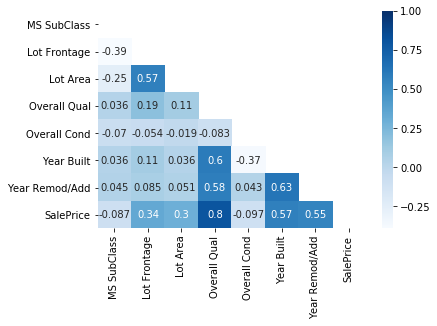

In [42]:
corr = train_data[["MS SubClass", "Lot Frontage", "Lot Area", "Overall Qual", "Overall Cond", "Year Built", "Year Remod/Add", "SalePrice"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,  mask = mask, annot = True,  cmap= "Blues")

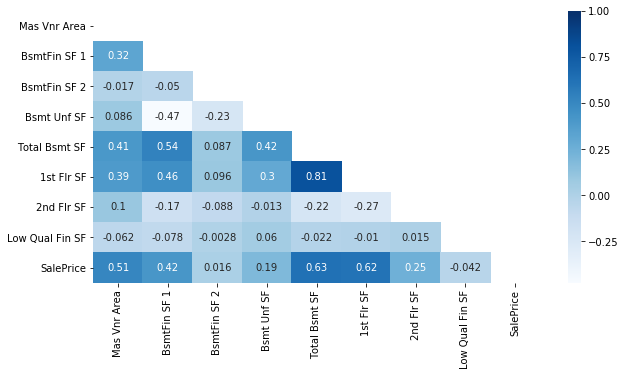

In [34]:
corr = train_data[["Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "1st Flr SF", "2nd Flr SF", "Low Qual Fin SF", "SalePrice"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches

sns.heatmap(corr,  mask = mask, annot = True,  cmap= "Blues")

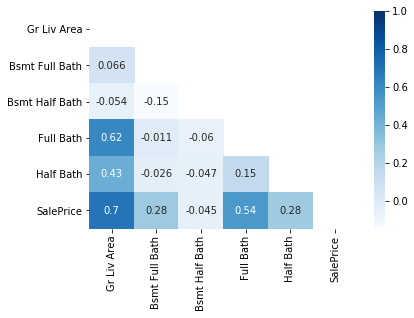

In [35]:
corr = train_data[["Gr Liv Area", "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath","SalePrice"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,  mask = mask, annot = True,  cmap= "Blues")

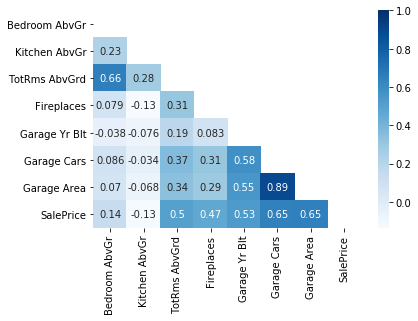

In [36]:
corr = train_data[["Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd", "Fireplaces", "Garage Yr Blt", "Garage Cars", "Garage Area","SalePrice"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,  mask = mask, annot = True,  cmap= "Blues")

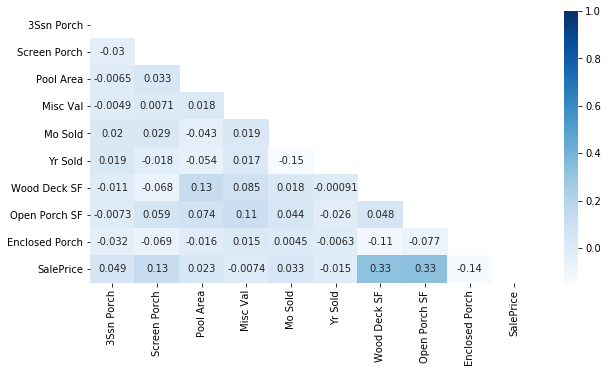

In [12]:
corr = train_data[[ "3Ssn Porch", "Screen Porch", "Pool Area", "Misc Val", "Mo Sold", "Yr Sold", "Wood Deck SF", "Open Porch SF", "Enclosed Porch", "SalePrice"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches

sns.heatmap(corr,  mask = mask, annot = True,  cmap= "Blues")

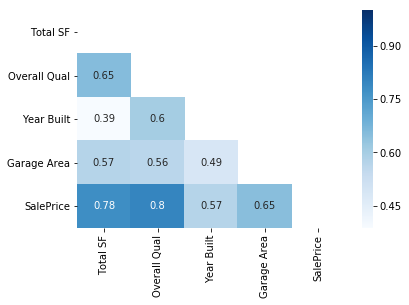

In [7]:
train_data["Total SF"] = train_data["1st Flr SF"] + train_data["2nd Flr SF"] + train_data["Total Bsmt SF"] + train_data["Low Qual Fin SF"]


corr = train_data[[ "Total SF", "Overall Qual", "Year Built", "Garage Area", "SalePrice"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,  mask = mask, annot = True,  cmap= "Blues")

### The numerical features selected for modelling include: 
* "Total SF"
* "Overall Qual"
* "Year Built"
* "Garage Area"

## 4.2 EDA for categorical variables

### * Display all the categorical features

In [28]:
display(data_type_test[data_type_test.iloc[:,1].values == np.dtype('O') ])

,Columns,Data Type
3,MS Zoning,object
6,Street,object
7,Alley,object
8,Lot Shape,object
9,Land Contour,object
10,Utilities,object
11,Lot Config,object
12,Land Slope,object
13,Neighborhood,object
14,Condition 1,object


In [31]:
def eda_categorical(column_name, dataset_name):
    sns.stripplot(x=column_name, y="SalePrice", data=dataset_name, jitter=True)
    display(dataset_name[column_name].value_counts())

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

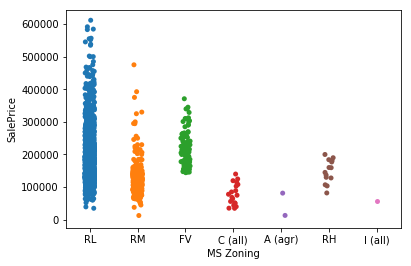

In [36]:
eda_categorical("MS Zoning", train_data)

Pave    2044
Grvl       7
Name: Street, dtype: int64

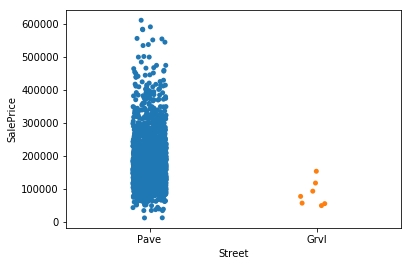

In [37]:
eda_categorical("Street", train_data)


Grvl    85
Pave    55
Name: Alley, dtype: int64

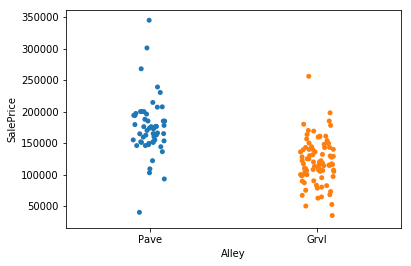

In [38]:
eda_categorical("Alley", train_data)

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

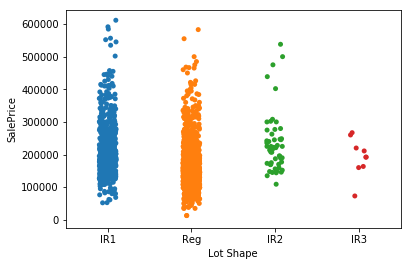

In [39]:
eda_categorical("Lot Shape", train_data)

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

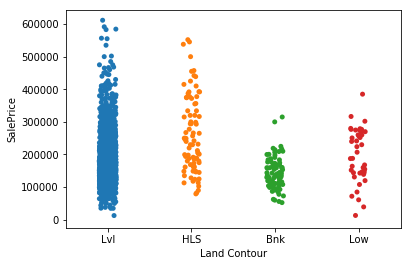

In [40]:
eda_categorical("Land Contour", train_data)

AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

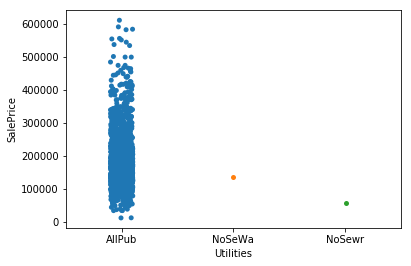

In [41]:
eda_categorical("Utilities", train_data)

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

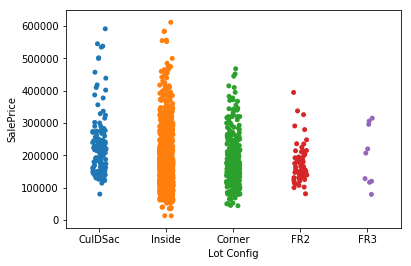

In [42]:
eda_categorical("Lot Config", train_data)

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

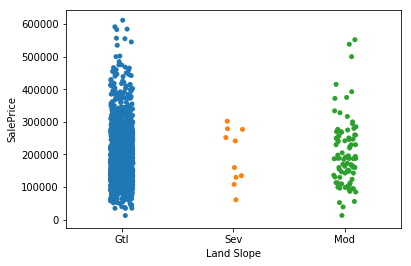

In [43]:
eda_categorical("Land Slope", train_data)

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

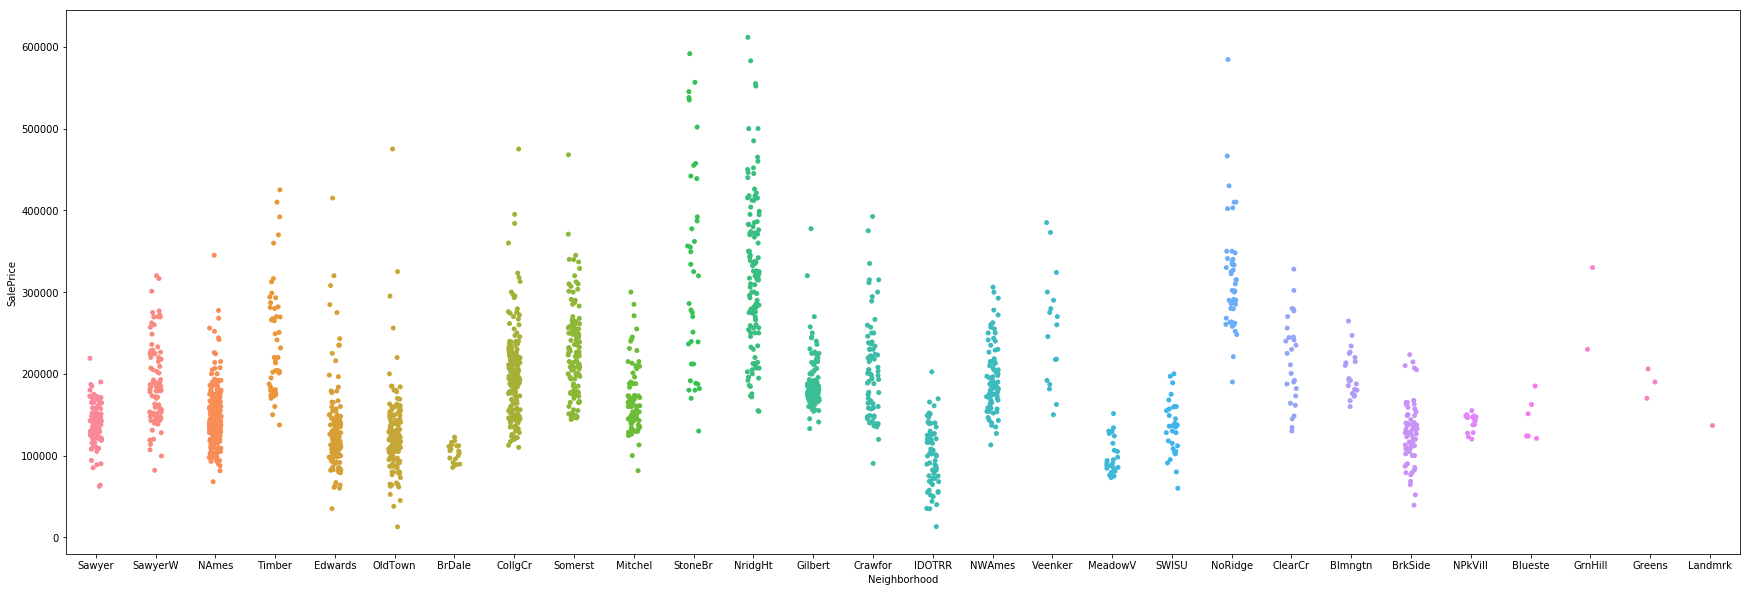

In [32]:
fig, ax = plt.subplots(figsize=(30,10))

eda_categorical("Neighborhood", train_data)

In [22]:
#eda_categorical("Neighborhood", train_data[train_data["Total SF"]>=2000 & train_data["Total SF"]<=2500])

train_data.filter(Total SF > 2000 , Total SF <2500)

SyntaxError: invalid syntax (<ipython-input-22-ee267e4c6a76>, line 3)

In [ ]:
g = sns.FacetGrid(train_data, row = "", col = "Neighborhood")
g.map(sns.scatterplot, "Total SF")

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

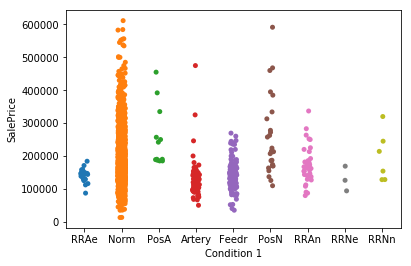

In [45]:
eda_categorical("Condition 1", train_data)

Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition 2, dtype: int64

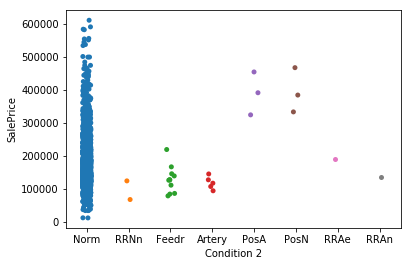

In [46]:
eda_categorical("Condition 2", train_data)

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

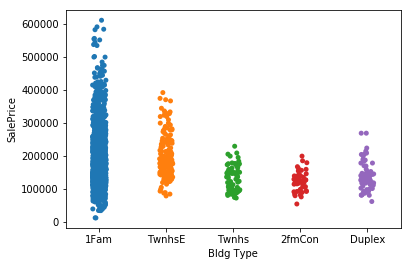

In [47]:
eda_categorical("Bldg Type", train_data)

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

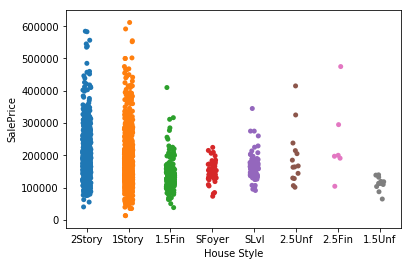

In [48]:
eda_categorical("House Style", train_data)

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

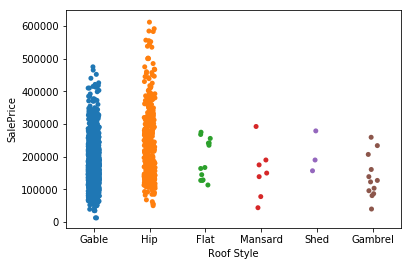

In [49]:
eda_categorical("Roof Style", train_data)

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

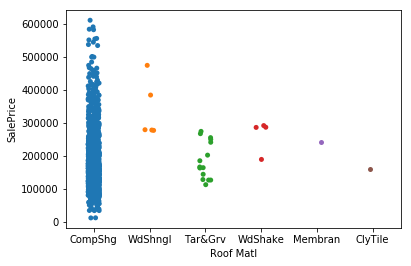

In [50]:
eda_categorical("Roof Matl", train_data)

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
CBlock       2
Stone        2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

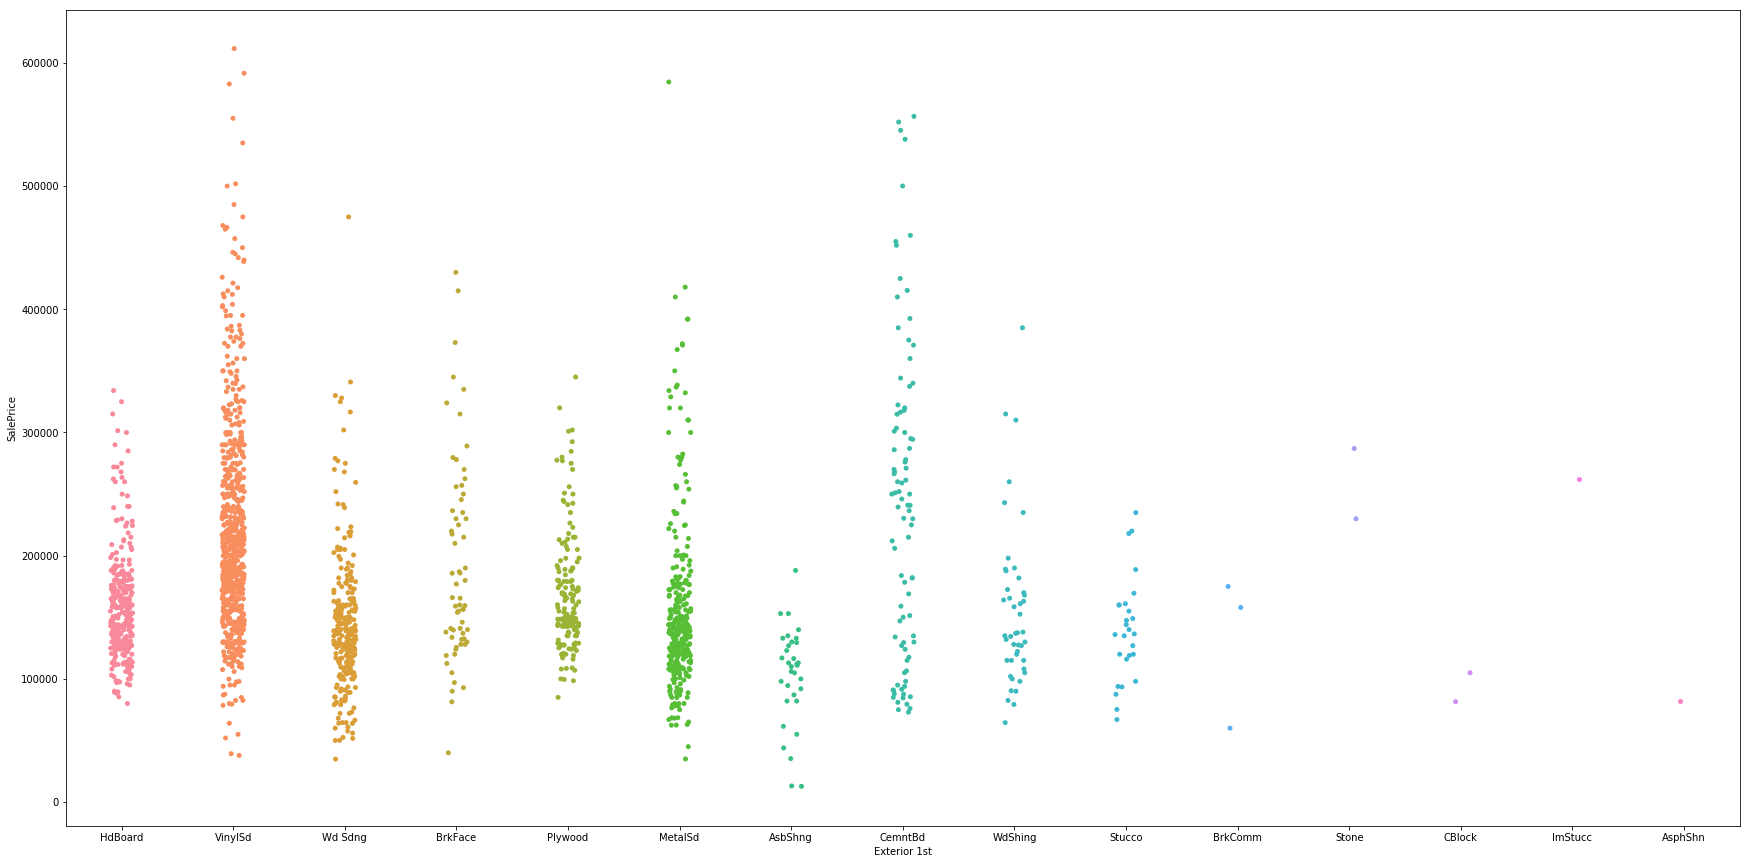

In [51]:
fig, ax = plt.subplots(figsize=(30,15))

eda_categorical("Exterior 1st", train_data)

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

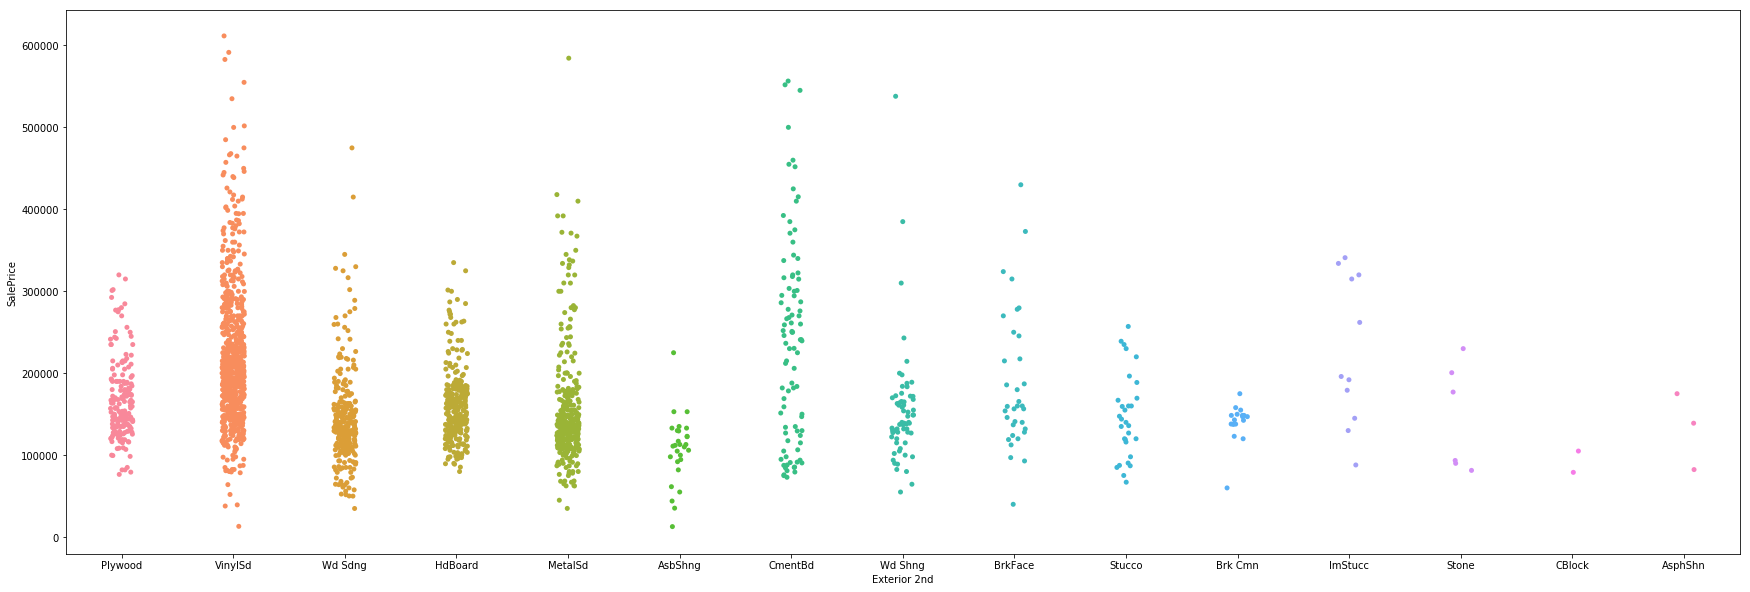

In [52]:
fig, ax = plt.subplots(figsize=(30,10))

eda_categorical("Exterior 2nd", train_data)

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

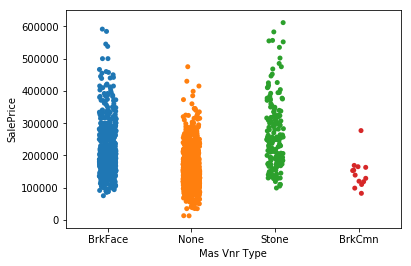

In [53]:
eda_categorical("Mas Vnr Type", train_data)

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

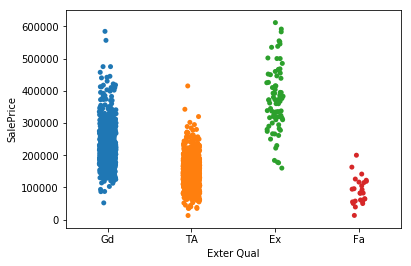

In [54]:
eda_categorical("Exter Qual", train_data)


TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

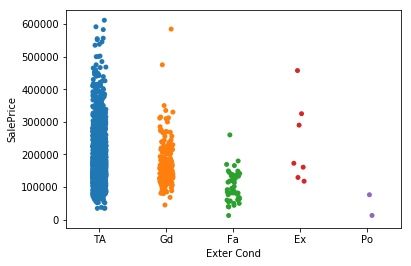

In [55]:
eda_categorical("Exter Cond", train_data)

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

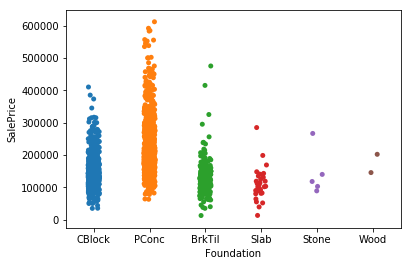

In [56]:
eda_categorical("Foundation", train_data)


TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

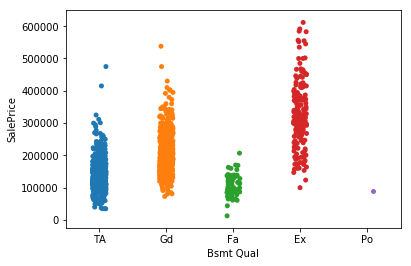

In [57]:
eda_categorical("Bsmt Qual", train_data)


TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

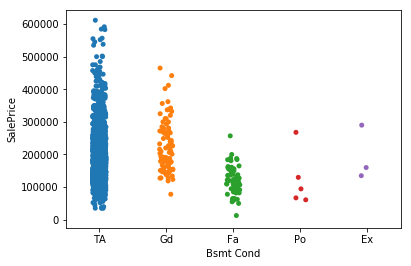

In [58]:
eda_categorical("Bsmt Cond", train_data)

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

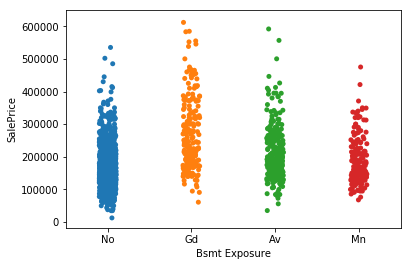

In [59]:
eda_categorical("Bsmt Exposure", train_data)

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

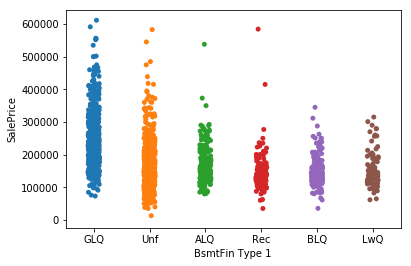

In [60]:
eda_categorical("BsmtFin Type 1", train_data)

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

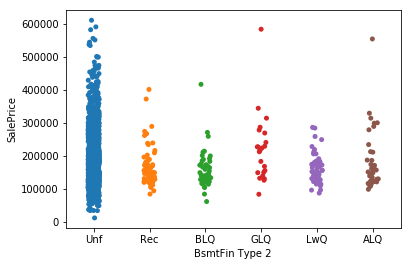

In [61]:
eda_categorical("BsmtFin Type 2", train_data)

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

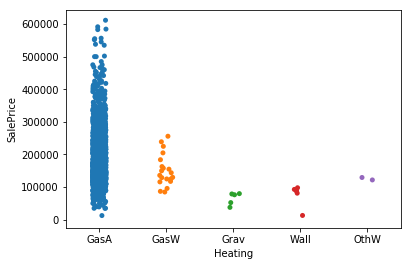

In [168]:
eda_categorical("Heating", train_data)


Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

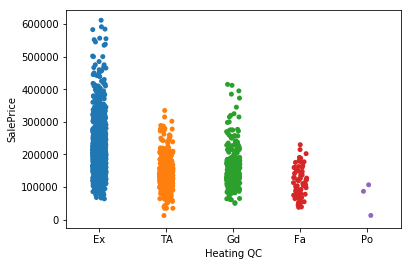

In [183]:
eda_categorical("Heating QC", train_data)

In [ ]:
g = sns.FacetGrid(train_data, row = "SalePrice", col = "Fireplaces")
g.map(sns.stripplot, "Heating QC")

Y    1910
N     141
Name: Central Air, dtype: int64

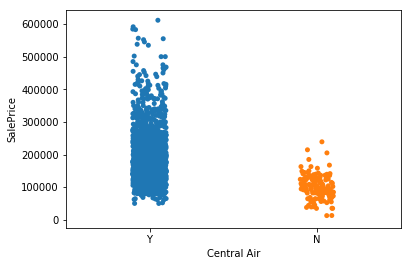

In [64]:
eda_categorical("Central Air", train_data)

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

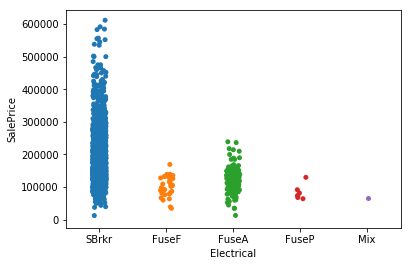

In [65]:
eda_categorical("Electrical", train_data)

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

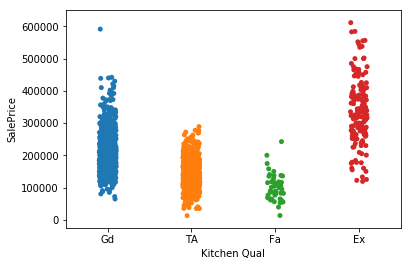

In [66]:
eda_categorical("Kitchen Qual", train_data)

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

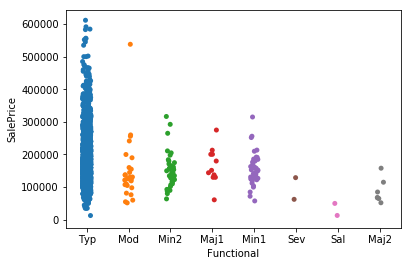

In [67]:
eda_categorical("Functional", train_data)

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

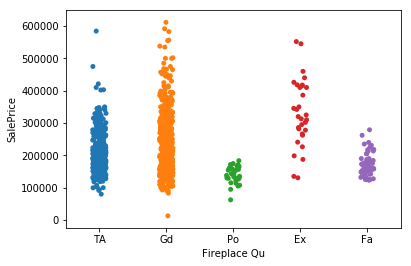

In [68]:
eda_categorical("Fireplace Qu", train_data)

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

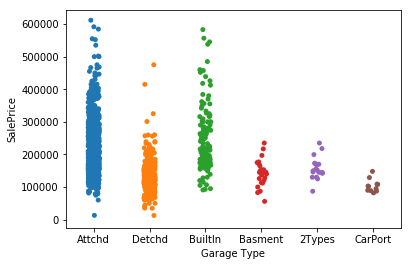

In [69]:
eda_categorical("Garage Type", train_data)

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

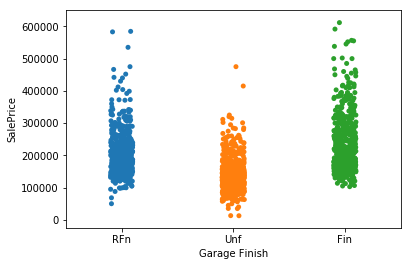

In [70]:
eda_categorical("Garage Finish", train_data)

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

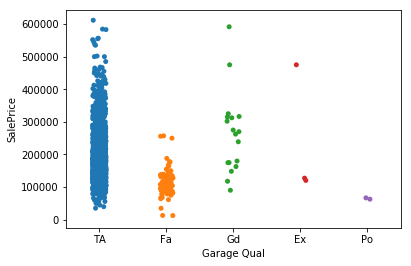

In [71]:
eda_categorical("Garage Qual", train_data)

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

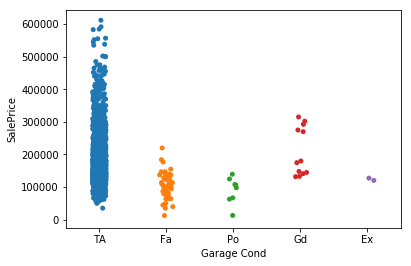

In [72]:
eda_categorical("Garage Cond", train_data)

Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

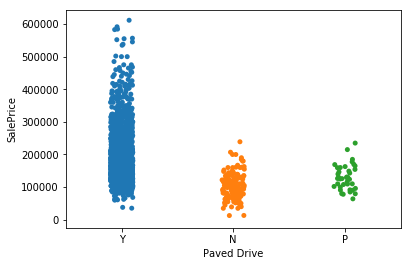

In [73]:
eda_categorical("Paved Drive", train_data)

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

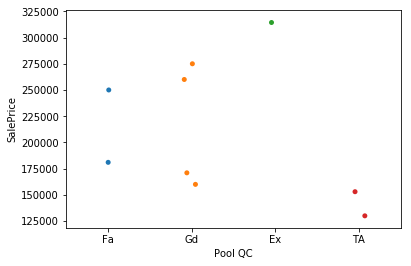

In [74]:
eda_categorical("Pool QC", train_data)

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

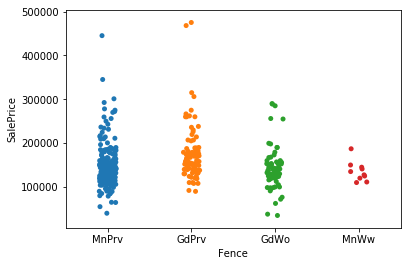

In [75]:
eda_categorical("Fence", train_data)

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

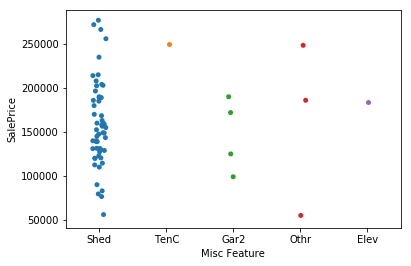

In [76]:
eda_categorical("Misc Feature", train_data)

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

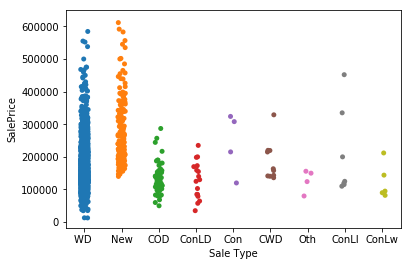

In [77]:
eda_categorical("Sale Type", train_data)

In [ ]:
1. Locality
2. Size
3. Quality
4. Amenities.

# 5. Fit a MLR using sklearn

## Use statsmodels.api and Ordinary Least Square model to look at the model summary and see if the 

In [96]:
X = train_data[["Total SF", "Overall Qual", "Year Built", "Garage Area"]].values
X = sm.add_constant(X)
y = train_data[["SalePrice"]].values

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

print("MSE:", mean_squared_error(y, predictions))
model.summary()

MSE: 1377779569.296214


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1820.
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        06:40:21   Log-Likelihood:                -24491.
No. Observations:                2051   AIC:                         4.899e+04
Df Residuals:                    2046   BIC:                         4.902e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.46e+05   6.67e+04     -9.680      0.000   -7.77e+05   -5.15e+05
x1            38.5247      1.421     27.112      0.000      35.738      41.311
x2          2.175e+04    890.890     24.410      0.000       2e+04    2.35e+04
x3           289.1816     35.139      8.230      0.000     220.269     358.094
x4            54.7400      5.015     10.916      0.000      44.905      64.575
==============================================================================
Omnibus:                      855.522   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83909.131
Skew:                          -1.003   Prob(JB):                         0.00
Kurtosis:                      34.271   Cond. No.                     2.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
display(train_data[["Total SF", "Overall Qual", "Year Built", "Garage Area"]].isnull().sum().sort_values(ascending=False))

Garage Area     0
Year Built      0
Overall Qual    0
Total SF        0
dtype: int64

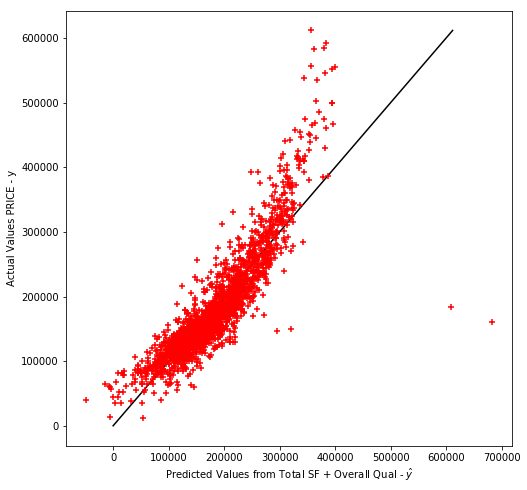

score:  0.7805689427184008


In [88]:
lm = linear_model.LinearRegression()

X = train_data[["Total SF", "Overall Qual", "Year Built", "Garage Area"]].values
y = train_data[["SalePrice"]].values

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Total SF + Overall Qual - $\hat{y}$")
plt.ylabel("Actual Values PRICE - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()

print("score: ", score)

C:\Users\shijo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Training Scores: 0.7817693142844722
Test Scores: 0.777525874341062


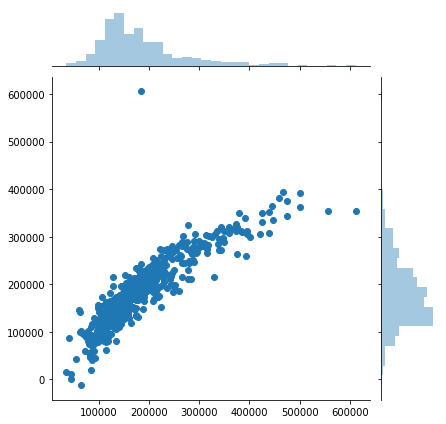

In [160]:
predictors = ["Total SF", "Overall Qual", "Year Built", "Garage Area"]

X_train, X_test, y_train, y_test = train_test_split(train_data[predictors], train_data[["SalePrice"]].values, train_size=0.7, random_state=8)

lr = LinearRegression()

lr.fit(X_train, y_train)

print("Training Scores: " + str(lr.score(X_train, y_train)))
print("Test Scores: " + str(lr.score(X_test, y_test)))
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

In [ ]:
yhat = pd.DataFrame()
y_hat['SalePrice'] = lr.predict(test_data[predictors])


yhat['Id'] = test_data['Id']
shd.to_csv(final_sub_reg_data_path)